In [1]:
import pandas_datareader.data as web

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import pandas as pd
import numpy as np

In [3]:
from talib import RSI, BBANDS
import matplotlib.pyplot as plt

In [11]:
import talib

In [4]:
start = '2015-04-22'
end = '2020-04-30'

In [5]:
#symbol = 'MCD'
#max_holding = 100
#price = web.DataReader(name=symbol, data_source='quandl', start=start, end=end, api_key="t5bEDxVq4AHqT155qKMF")
#price = price.iloc[::-1]
#price = price.dropna()
#close = price['AdjClose'].values

In [6]:
symbol = 'AAPL'

price = web.DataReader(name=symbol, data_source='quandl', start=start, end=end, api_key="your api key")

max_holding = 100

price = price.iloc[::-1]

price = price.dropna()

close = pd.DataFrame()

close = price['AdjClose']#.values

close = close.reset_index()

close.columns = 'Date Close'.split()

close = close.set_index('Date')

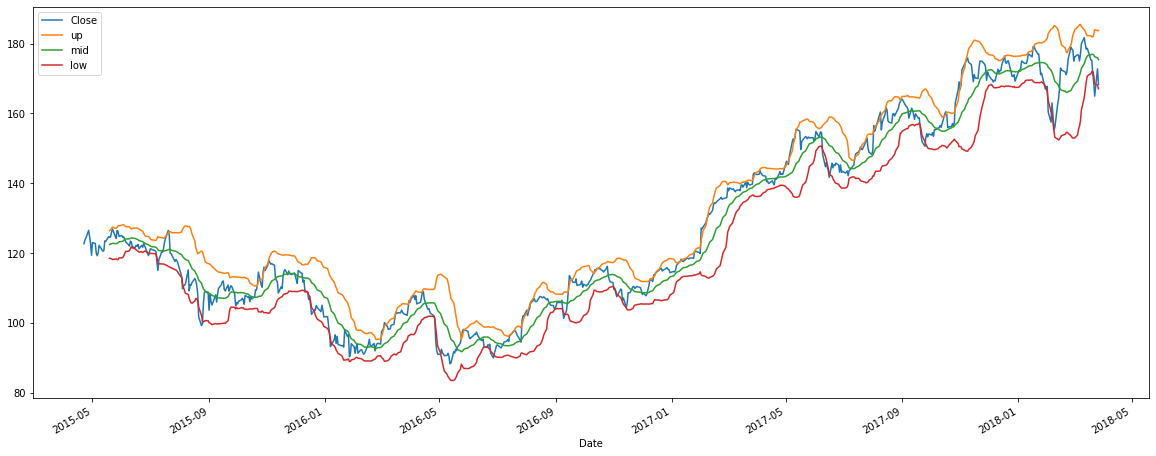

In [7]:
close['up'], close['mid'], close['low'] = BBANDS(close['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

close.plot(figsize=(20,8))

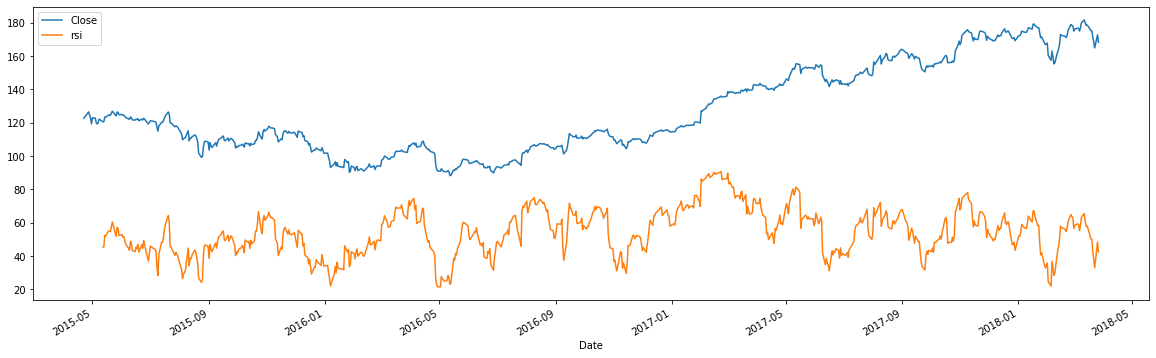

In [8]:
close['rsi'] = RSI(close['Close'], timeperiod=14)

close[['Close','rsi']].plot(figsize=(20,6))

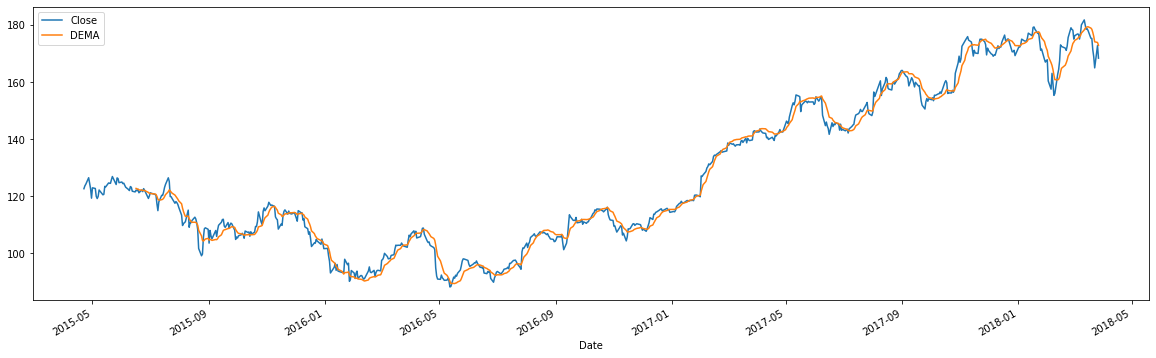

In [12]:
close['DEMA'] = talib.DEMA(close['Close'], timeperiod=20)

close[['Close','DEMA']].plot(figsize=(20,6))

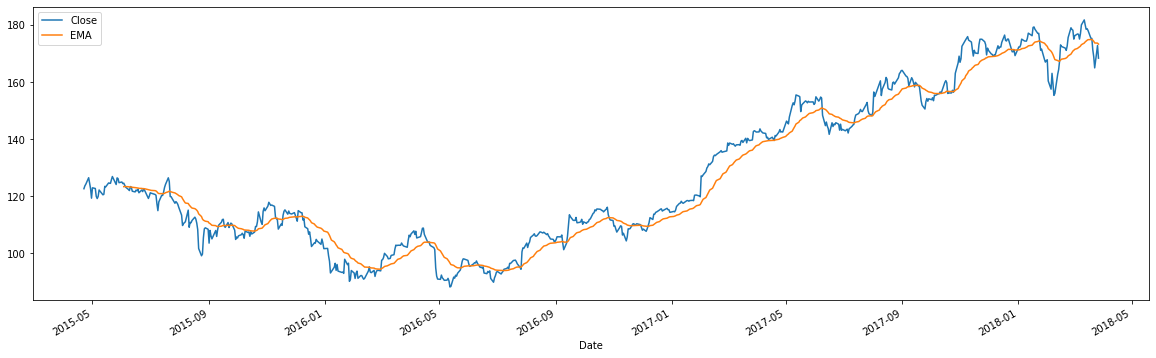

In [13]:
close['EMA'] = talib.EMA(close['Close'], timeperiod=30)

close[['Close','EMA']].plot(figsize=(20,6))

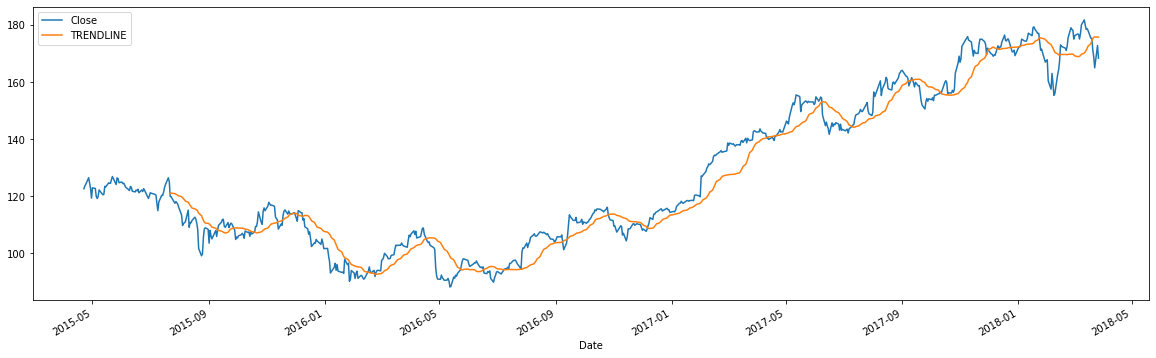

In [14]:
close['TRENDLINE'] = talib.HT_TRENDLINE(close['Close'])

close[['Close','TRENDLINE']].plot(figsize=(20,6))

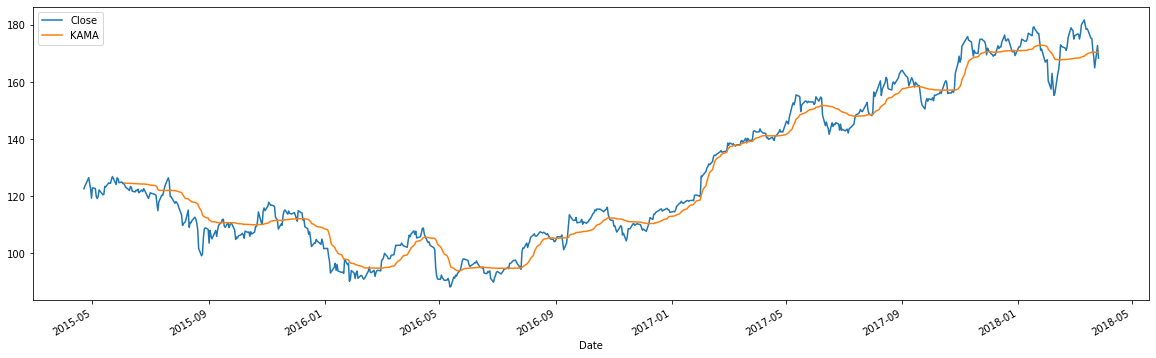

In [15]:
close['KAMA'] = talib.KAMA(close['Close'], timeperiod=30)

close[['Close','KAMA']].plot(figsize=(20,6))

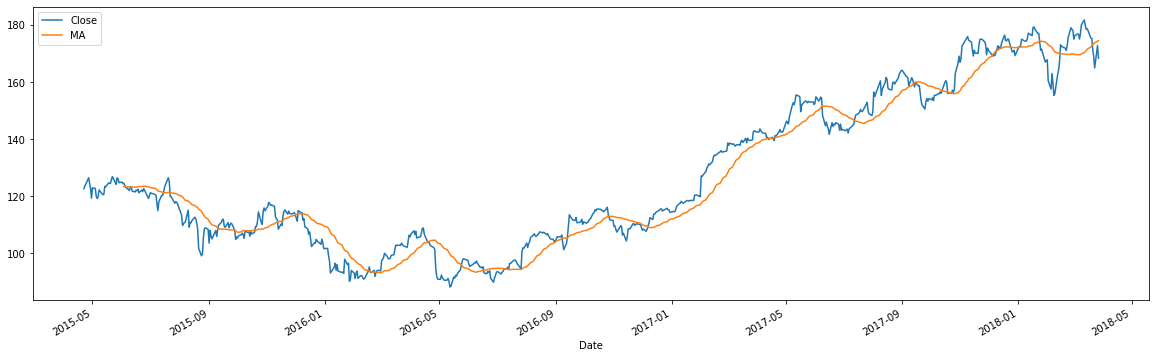

In [16]:
close['MA'] = talib.MA(close['Close'],timeperiod=30,matype=0)

close[['Close','MA']].plot(figsize=(20,6))